# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
        
    #Print error message and move to the next city
    except:
        print("City not found,Skipping...")
      

City not found,Skipping...
City Name: gadzhiyevo, City ID: 562245
City Name: port-aux-francais, City ID: 1546102
City not found,Skipping...
City Name: masterton, City ID: 2206890
City Name: yellowknife, City ID: 6185377
City Name: lodja, City ID: 211647
City Name: bilibino, City ID: 2126682
City Name: tiksi, City ID: 2015306
City Name: bure, City ID: 341397
City Name: chonchi, City ID: 3894871
City Name: tazovsky, City ID: 1489853
City Name: waitangi, City ID: 4032804
City Name: colonia, City ID: 2886242
City Name: adamstown, City ID: 4030723
City Name: serhiyivka, City ID: 694467
City Name: ribeira grande, City ID: 3372707
City Name: grytviken, City ID: 3426466
City Name: ushuaia, City ID: 3833367
City Name: albany, City ID: 5106841
City Name: prince rupert, City ID: 6113406
City Name: bethel, City ID: 5282297
City Name: westport, City ID: 4845585
City Name: margaret river, City ID: 2066981
City Name: puerto natales, City ID: 3874958
City Name: crane, City ID: 5519648
City Name: fortu

City Name: punta arenas, City ID: 3874787
City Name: flin flon, City ID: 5954718
City Name: cukai, City ID: 1732945
City Name: pierre, City ID: 5767918
City Name: puerto leguizamo, City ID: 3671437
City Name: horta, City ID: 3372988
City Name: paso de los toros, City ID: 3441273
City Name: puerto ayora, City ID: 3652764
City Name: kingston, City ID: 3489854
City Name: ust-nera, City ID: 2120048
City Name: mitchell, City ID: 5229794
City Name: mermoz boabab, City ID: 8030383
City Name: pea ridge, City ID: 4817825
City not found,Skipping...
City Name: ar ruways, City ID: 292688
City Name: saint-francois, City ID: 2980080
City Name: namibe, City ID: 3347019
City Name: buta, City ID: 217570
City Name: tavira, City ID: 2262744
City Name: bubaque, City ID: 2374583
City Name: belmonte, City ID: 3470137
City Name: santana, City ID: 3391360
City Name: nha trang, City ID: 1572151
City Name: whitehorse, City ID: 6180550
City Name: tolanaro, City ID: 1055433
City Name: portland, City ID: 5746545
C

City Name: yelizovo, City ID: 2119538
City Name: rundu, City ID: 3353383
City Name: naze, City ID: 1855540
City Name: ceeldheer, City ID: 62788
City Name: souillac, City ID: 933995
City Name: piti village, City ID: 4038473
City Name: bereket, City ID: 161974
City Name: choibalsan, City ID: 2032054
City Name: ciamis, City ID: 1647149
City Name: selfoss, City ID: 3413604
City Name: floro, City ID: 3156980
City Name: kupino, City ID: 1501365
City Name: bezhetsk, City ID: 576566
City Name: pisco, City ID: 3932145
City Name: madras, City ID: 1264527
City Name: vitoria do mearim, City ID: 3384986
City Name: coquimbo, City ID: 3893629
City Name: kenai, City ID: 5866063
City Name: trincomalee, City ID: 1226260
City Name: cam ranh, City ID: 1586350
City Name: posse, City ID: 3452599
City Name: miracema do tocantins, City ID: 3384937
City Name: talnakh, City ID: 1490256
City Name: lerwick, City ID: 2644605
City not found,Skipping...
City Name: durban, City ID: 1007311
City Name: ellettsville, Ci

In [13]:
# Convert the cities weather data into a Pandas DataFrame
cities_df = pd.DataFrame({"City ID": city_id_list, "City" : city_name_list, "Country": country_list,
                         "Lat": lat_list, "Lng": lng_list, "Temperature" : temp_list,
                         "Humidity" : humidity_list, "Clouds": clouds_list, "Wind Speed": wind_speed_list})

# Show Record Count
cities_df.count()

City ID        579
City           579
Country        579
Lat            579
Lng            579
Temperature    579
Humidity       579
Clouds         579
Wind Speed     579
dtype: int64

In [18]:
# Display sample data
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,562245,Gadzhiyevo,RU,69.2551,33.3362,13.33,94,84,4.72
1,1546102,Port-aux-Français,TF,-49.3500,70.2167,39.34,73,97,26.66
2,2206890,Masterton,NZ,-40.9597,175.6575,52.12,95,100,5.10
3,6185377,Yellowknife,CA,62.4560,-114.3525,9.12,85,100,6.91
4,211647,Lodja,CD,-3.4833,23.4333,69.96,99,99,1.10


In [19]:
# Export the City_Data into a csv
cities_df.to_csv("Output/city_weather.csv", index = False, header = True)

In [20]:
# Read saved data
cities_df = pd.read_csv("Output/city_weather.csv")

# Display sample data
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,562245,Gadzhiyevo,RU,69.2551,33.3362,13.33,94,84,4.72
1,1546102,Port-aux-Français,TF,-49.3500,70.2167,39.34,73,97,26.66
2,2206890,Masterton,NZ,-40.9597,175.6575,52.12,95,100,5.10
3,6185377,Yellowknife,CA,62.4560,-114.3525,9.12,85,100,6.91
4,211647,Lodja,CD,-3.4833,23.4333,69.96,99,99,1.10


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

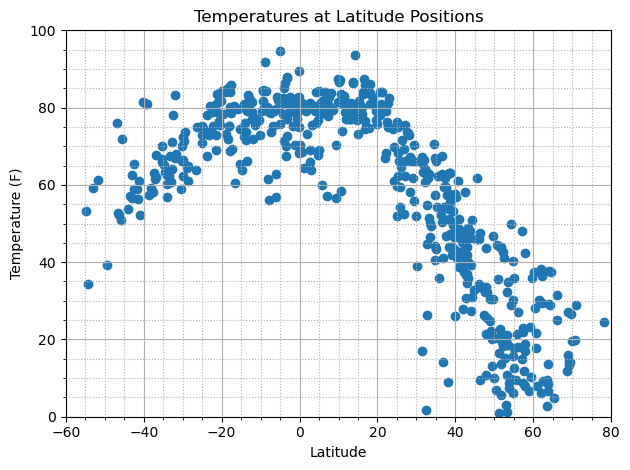

In [26]:
# CREATE THE SCATTER PLOTS REQUESTED
#Latitude Vs. Temperature

# Build scatter plot for latitude vs. temperature
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

# Save the figure
plt.savefig("Images/lat_temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

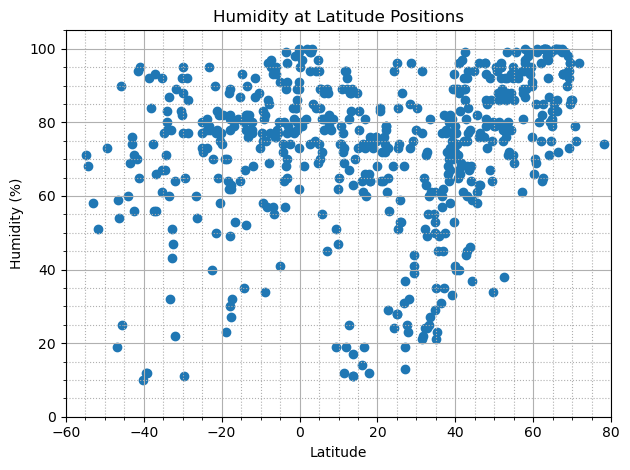

In [22]:
#Latitude Vs. Humidity

# Build the scatter plots for latitude vs. humidity
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

# Save the figure
plt.savefig("Images/lat_humid.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

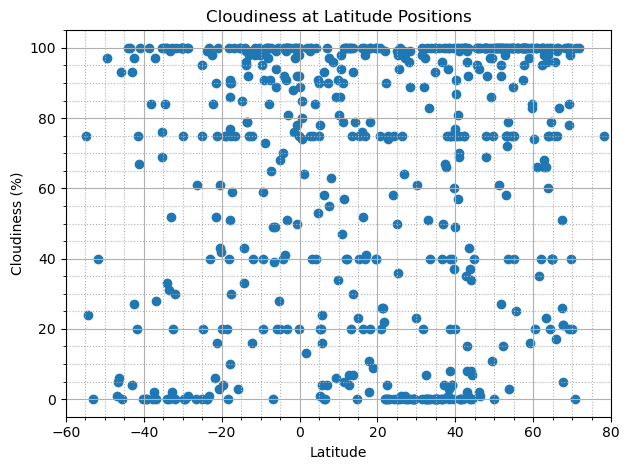

In [23]:
#Latitude Vs. Cloudiness

# Build the scatter plots for latitude vs. humidity
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

# Save the figure
plt.savefig("Images/lat_cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

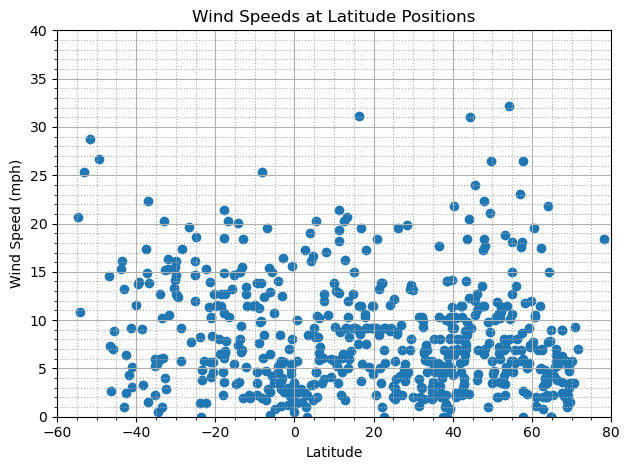

In [27]:
#Latitude Vs. Wind Speed Plot

# Build the scatter plots for latitude vs. humidity
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

# Save the figure
plt.savefig("Images/lat_wind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
#Create a function to create Linear Regression plots

def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_values)
    regress_values = x_values * slope + intercept
    
    line_eq = "y= "+ str(round(slope,2)) + "x + " + str(round(intercept,2))
    correlation = st.pearsonr(x_values, y_values)
    
    print(f"r-squared: {rvalue**2}")
    print(f"Correlation : {correlation}")
    print(f"Line : {line_eq}")
   
    return regress_values, line_eq

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
mask = cities_df['Lat'] >0

northern_hemisphere = cities_df[mask]

# Display sample data
northern_hemisphere.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,562245,Gadzhiyevo,RU,69.2551,33.3362,13.33,94,84,4.72
3,6185377,Yellowknife,CA,62.4560,-114.3525,9.12,85,100,6.91
5,2126682,Bilibino,RU,68.0546,166.4372,-13.02,99,100,2.17
6,2015306,Tiksi,RU,71.6872,128.8694,-19.32,96,100,7.05
7,341397,Burē,ET,10.7000,37.0667,58.39,79,94,5.21


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
mask = cities_df['Lat'] < 0

southern_hemisphere = cities_df[mask]

# Display sample data
southern_hemisphere.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
1,1546102,Port-aux-Français,TF,-49.3500,70.2167,39.34,73,97,26.66
2,2206890,Masterton,NZ,-40.9597,175.6575,52.12,95,100,5.10
4,211647,Lodja,CD,-3.4833,23.4333,69.96,99,99,1.10
8,3894871,Chonchi,CL,-42.6128,-73.8092,65.41,56,27,6.44
10,4032804,Waitangi,NZ,-43.9535,-176.5597,53.82,60,100,15.26


###  Temperature vs. Latitude Linear Regression Plot

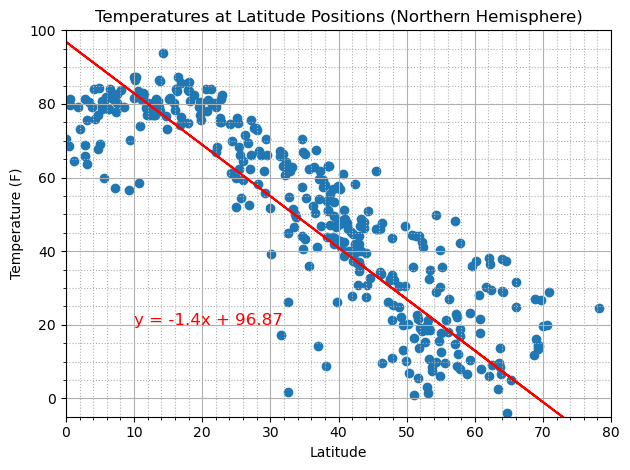

In [31]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]



(slope, intercept, rvalue, pvalue, strderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values,y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.savefig("Images/nh_lat_temp_regression.png")

plt.show()

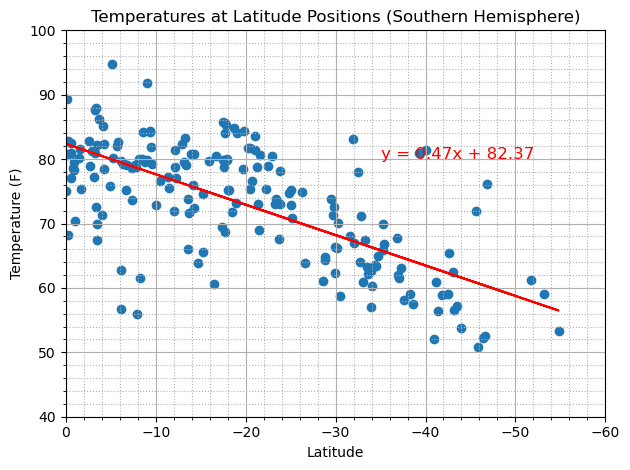

In [32]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.savefig("Images/sh_lat_temp_regression.png")
plt.show()

# Discussion about the linear Relationship:

#Answer

Max Temp vs. Latitude Linear Regression

Both the Northern and Southern Hemispheres show the same inverse relationship between latitude
and temperature. As you get closer to the equator (latitude 0) the higher the temperature gets. 
There is a strong correlation for both hemishperes, but the Northern Hemisphere seems to have an almost one to one relationship.

### Humidity vs. Latitude Linear Regression Plot

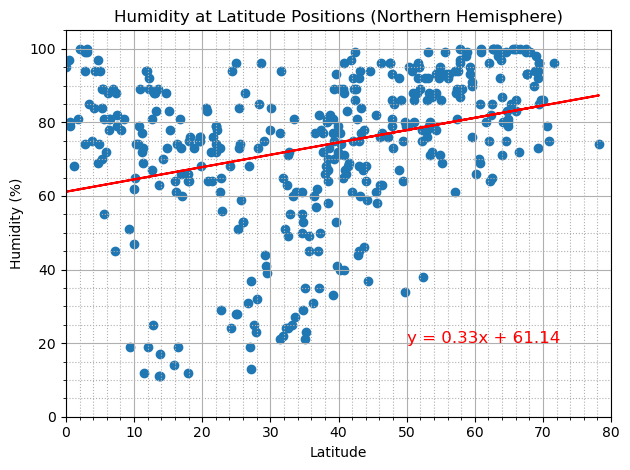

In [33]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.savefig("Images/nh_lat_humid_regression.png")
plt.show()

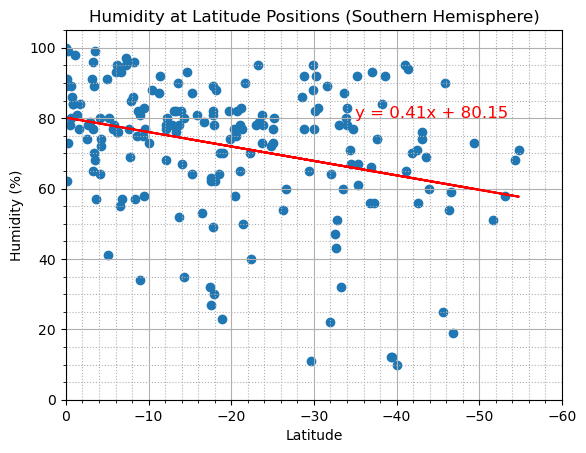

In [34]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()

plt.savefig("Images/sh_lat_humid_regression.png")
plt.show()

# Discussion about the linear relationship:Humidity % vs. Latitude Linear Regression

#Answer

There does not seem to be a very strong correlation between humidity and latitude. 
However, there does seem to be a slight positive correlation in the Northern Hemisphere 
and a slight negative correlation in the Southern Hemisphere; meaning in the Northern Hemisphere 
as you get further away from the equator (latitude 0) humidity increases, and in the Southern Hemisphere it decreases 
as you get further away from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

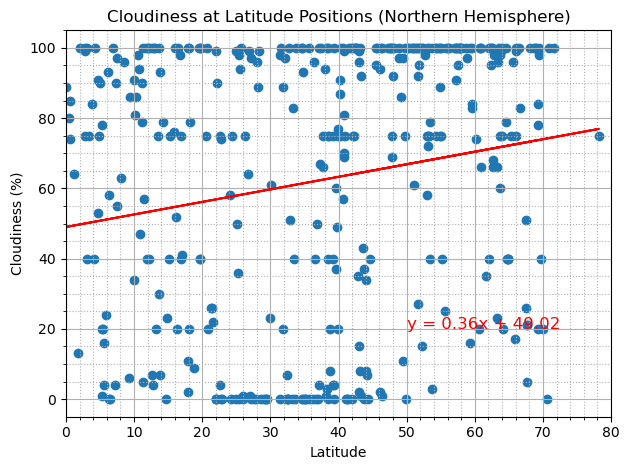

In [35]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.savefig("Images/nh_lat_clouds_regression.png")
plt.show()

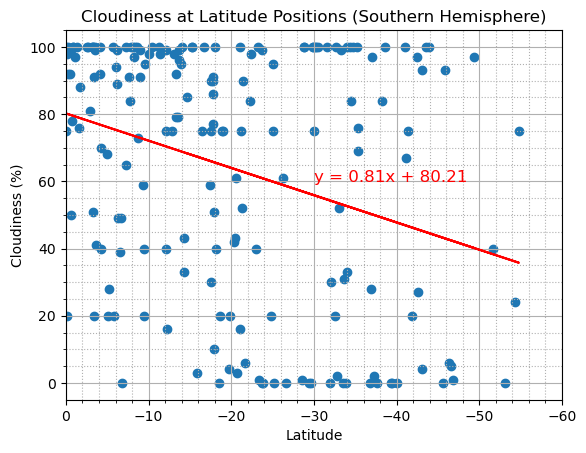

In [36]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()

plt.savefig("Images/sh_lat_clouds_regression.png")
plt.show()

# Discussion about the linear relationship: Cloudiness vs. Latitude Linear Regression

# Answer

There does not seem to be much correlation between cloudiness and latitude when you look at the plots.
However, when the linear regression is performed, you can see that there is a slight positive correlation 
in the Northern Hemisphere but a strong negative correlation in the Southern Hemisphere.
In the Southern Hemisphere it shows that the further you are from the equator (latitude 0) the less cloudy it is.

### Wind Speed vs. Latitude Linear Regression Plot

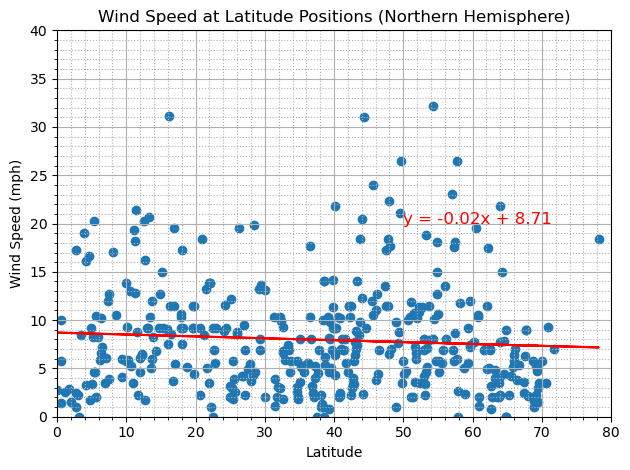

In [40]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.savefig("Images/nh_lat_wind_regression.png")
plt.show()

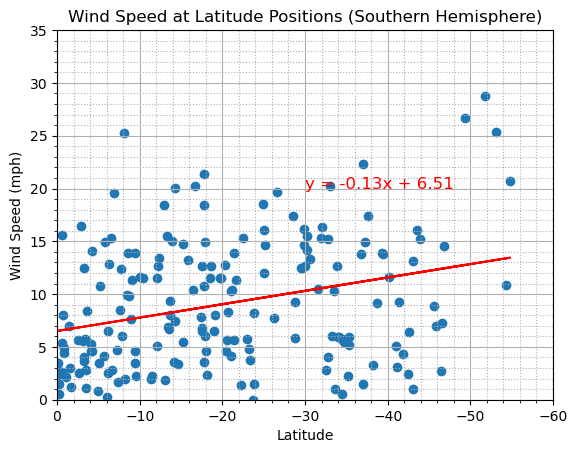

In [41]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()

plt.savefig("Images/sh_lat_wind_regression.png")
plt.show()

# Discussion about the linear relationship: Wind Speed vs. Latitude Linear Regression

There does seem to be a pretty strong correlation between wind sped and latitude when you look at the plots. 
However, the linear regresion shows a much lower correlation than it appears. There is still a definite correlation 
in both hemispheres, in that the further you are from the equator (latitude 0) the higher the wind speeds are, 
but the slope of the regression line is much shallower than I was expecting looking at the plots.